In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# Building an Image Classifier

First lets install and import Tensorflow and Keras

conda install tensorflow

conda install pip

pip install --upgrade tensorflow==2.0.0-rc1

In [1]:
import tensorflow as tf
from tensorflow import keras

ModuleNotFoundError: No module named 'tensorflow'

In [2]:
keras.__version__


NameError: name 'keras' is not defined

In [4]:
tf.__version__

'2.3.0'

#  Usage

from keras.datasets import fashion mnist

     (x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()
     
Returns 2 Tuples:

1. x_train, x_test - uint8 array of greyscale image data with numsamples, 28,28

2. y_train, y_test - uint8 array of labels(integers from range 1-9) with shape(numsamples)

In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_full, y_train_full),(x_test, y_test) = fashion_mnist.load_data()

In [1]:
plt.imshow(x_train_full[1])

NameError: name 'plt' is not defined

In [7]:
y_train_full[1]

0

In [8]:
class_names = ["T-Shirt/Top", "Trouser", "Pullover", "Dress", "Coat", 
              "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

In [9]:
class_names[y_train_full[10]]

'T-Shirt/Top'

In [10]:
x_train_full[1]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  

# Data Normalization

We normalize the data dimensions so that they are approximately the same scale

In [11]:
x_train_n = x_train_full / 255.
x_test_n = x_test / 255.

# Split the Data into Train/Validation/Test Datasets

In the earlier step of importing we has 60,000 train datasets and 10,000 test datasets. Now we further split the training data into Train/Validation. Here's how each of the datasets is used in deep learning:
 - Training Data -- used for training the model
 - Validation Data -- used for tuning the hyperparameters and evaluate the models
 - Test Data -- Used to test the model after it has gone through initial vetting by validation set

In [12]:
x_valid, x_train = x_train_n[:5000], x_train_n[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
x_test = x_test_n

# Building a Sequential Model

In [14]:
np.random.seed(42)
tf.random.set_seed(42)

In [15]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28,28]))
model.add(keras.layers.Dense(300, activation = "relu"))
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dense(10, activation = "softmax"))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


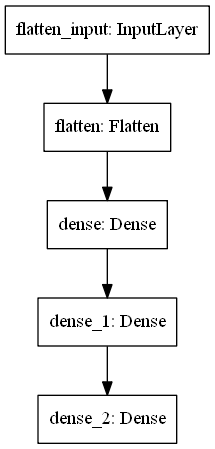

In [17]:
import pydot
keras.utils.plot_model(model)

We can access the parameters using get_weight() method

In [18]:
weights, biases = model.layers[1].get_weights()

In [19]:
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [20]:
weights.shape

(784, 300)

In [21]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [22]:
biases.shape

(300,)

### Compiling and Training

Documentation: https://keras.io/api/models/sequential/

In [23]:
model.compile(loss = "sparse_categorical_crossentropy",
             optimizer = "sgd",
             metrics = ["accuracy"])

In [25]:
model_history = model.fit(x_train, y_train, epochs = 30,
                         validation_data = (x_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3865 - accuracy: 0.8637 - val_loss: 0.3826 - val_accuracy: 0.8646
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3713 - accuracy: 0.8690 - val_loss: 0.3603 - val_accuracy: 0.8736
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3583 - accuracy: 0.8730 - val_loss: 0.4402 - val_accuracy: 0.8352
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3476 - accuracy: 0.8763 - val_loss: 0.3472 - val_accuracy: 0.8788
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3389 - accuracy: 0.8796 - val_loss: 0.3391 - val_accuracy: 0.8760
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3273 - accuracy: 0.8830 - val_loss: 0.3390 - val_accuracy: 0.8814
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3201 - accuracy: 0.8861 - val_loss: 0.3368 - val_accuracy:

In [26]:
model_history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [27]:
model_history.history

{'loss': [0.38654863834381104,
  0.3713248670101166,
  0.3583339750766754,
  0.34756404161453247,
  0.3389336168766022,
  0.3272954225540161,
  0.32013383507728577,
  0.3129047453403473,
  0.3056688606739044,
  0.29912376403808594,
  0.29373541474342346,
  0.28644517064094543,
  0.2812776267528534,
  0.2764842212200165,
  0.27040913701057434,
  0.2659444808959961,
  0.2616422474384308,
  0.2564665973186493,
  0.2523851692676544,
  0.24772775173187256,
  0.24359756708145142,
  0.23926474153995514,
  0.23563668131828308,
  0.23118966817855835,
  0.22706224024295807,
  0.2240830361843109,
  0.21992747485637665,
  0.21683676540851593,
  0.2130962461233139,
  0.21013613045215607],
 'accuracy': [0.8637454509735107,
  0.8690363764762878,
  0.8729636073112488,
  0.8763272762298584,
  0.8795818090438843,
  0.8830181956291199,
  0.8860909342765808,
  0.8877636194229126,
  0.890254557132721,
  0.8932545185089111,
  0.8943091034889221,
  0.8962727189064026,
  0.8990727066993713,
  0.90161818265914

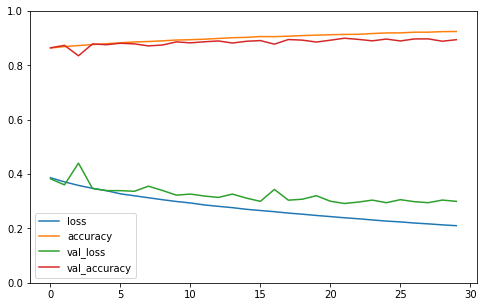

In [30]:
import pandas as pd
pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid = True
plt.gca().set_ylim(0, 1)
plt.show()

### Evaluating Perfomance and Predicting

In [31]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3337 - accuracy: 0.8856


[0.3336724042892456, 0.8855999708175659]

#  Predicting

In [33]:
x_new = x_test[:3]

In [34]:
y_proba = model.predict(x_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.02, 0.  , 0.98],
       [0.  , 0.  , 0.98, 0.  , 0.02, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [36]:
y_pred = model.predict_classes(x_new)
y_pred

array([9, 2, 1], dtype=int64)

In [37]:
np.array(class_names)[y_pred]

array(['Ankle Boot', 'Pullover', 'Trouser'], dtype='<U11')

AxesImage(54,36;334.8x217.44)


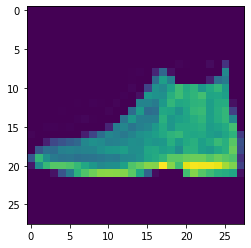

In [38]:
print(plt.imshow(x_test[0]))

AxesImage(54,36;334.8x217.44)


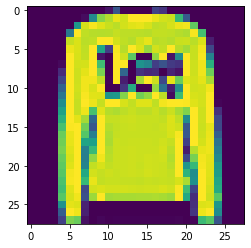

In [39]:
print(plt.imshow(x_test[1]))

AxesImage(54,36;334.8x217.44)


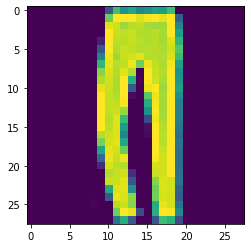

In [40]:
print(plt.imshow(x_test[2]))